In [17]:
import requests
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

url = 'http://spreadtrends.com/api/nfl/games/2020?format=json'

game_data = requests.get(url).json()

# create dataframe of results using pandas json normalize
df = pd.json_normalize(game_data, record_path = ['results'])

# create dataframe of the columns we want to analyze

weather_df = df[['gameId', 'season', 'type','surface', 'temperature', 'conditions', 'windSpeed']]

# filter out all game types other than 'Regular'
weather_df = weather_df.loc[weather_df['type'] == 'Regular']

weather_df.head()

,gameId,season,type,surface,temperature,conditions,windSpeed
13,5463,2020,Regular,Grass,38.0,light rain,10.29
14,5453,2020,Regular,Grass,57.0,broken clouds,6.93
15,5454,2020,Regular,Grass,34.0,mist,6.93
16,5457,2020,Regular,Turf-Roof,34.0,overcast clouds,14.99
17,5459,2020,Regular,Turf-Roof,64.0,few clouds,12.75


In [20]:
pd.DataFrame(game_data["results"])[['gameId', 'season', 'type','surface', 'temperature', 'conditions', 'windSpeed']]

,gameId,season,type,surface,temperature,conditions,windSpeed
0,5480,2020,SuperBowl,Grass,57.0,partly cloudy,7.00
1,5478,2020,Playoff-CONF,Grass,39.0,overcast clouds,9.22
2,5479,2020,Playoff-CONF,Grass,29.0,overcast clouds,9.22
3,5475,2020,Playoff-DIV,Turf-Dome,54.0,clear sky,5.75
4,5477,2020,Playoff-DIV,Grass,41.0,broken clouds,16.11
...,...,...,...,...,...,...,...
264,4931,2020,Regular,Grass,81.0,clear sky,5.00
265,4932,2020,Regular,Turf-Dome,71.0,partly cloudy,14.00
266,4933,2020,Regular,Turf-Roof,80.0,cloudy,7.00
267,4934,2020,Regular,Turf,70.0,partly cloudy,8.00


In [2]:
# calculate yards per rush attempt

yards_per_rush = rb_df['rushYds'] / rb_df['rush']

rb_df['yards per rush'] = yards_per_rush

rb_df.head()

NameError: name 'rb_df' is not defined

In [3]:
# loop through all weeks in the season and create data frame with stats

player_stats_data_df = pd.DataFrame([])

for x in range(1,18):
    stats_url = f'http://spreadtrends.com/api/nfl/games/2020/{x}/stats?format=json'
    stats_results = requests.get(stats_url).json()
    temp_df = pd.json_normalize(stats_results, record_path = ['results'])
    player_stats_data_df = player_stats_data_df.append(temp_df)
    
#create a csv file


player_stats_data_df.to_csv('game_stats.csv')


In [4]:
player_stats_data_df

,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,passTds,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds
0,4936,2020,1,Juszczyk,K,FB,40,Cardinals,49ers,0,...,0,0,0,0,1,7,0,1,41,0
1,4936,2020,1,Garoppolo,J,QB,10,Cardinals,49ers,33,...,2,0,3,16,1,9,0,0,0,0
2,4936,2020,1,Mostert,R,RB,43,Cardinals,49ers,0,...,0,0,0,0,15,56,0,4,95,1
3,4936,2020,1,McKinnon,J,RB,31,Cardinals,49ers,0,...,0,0,0,0,3,24,0,3,20,1
4,4936,2020,1,Coleman,T,RB,26,Cardinals,49ers,0,...,0,0,0,0,4,18,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,5463,2020,17,Sims Jr.,Steven,WR,15,Eagles,Washington,0,...,0,0,0,0,1,18,0,1,6,0
336,5463,2020,17,Gibson,Antonio,WR,24,Eagles,Washington,0,...,0,0,0,0,19,75,0,1,6,0
337,5463,2020,17,Sims,Cam,WR,89,Eagles,Washington,0,...,0,0,0,0,0,0,0,5,43,0
338,5463,2020,17,McKissic,J.D.,WR,30,Eagles,Washington,0,...,0,0,0,0,2,0,0,5,30,0


In [5]:
# QB Rating cacluation

A = ((player_stats_data_df['comp'] / player_stats_data_df['att'])-.3)*5
B = ((player_stats_data_df['passYds'] / player_stats_data_df['att'])-3)*.25
C = ((player_stats_data_df['passTds'] / player_stats_data_df['att']))*20
D = (2.375 - ((player_stats_data_df['ints'] / player_stats_data_df['att'])*25))

qb_rating = ((A + B + C + D)/6)*100

In [9]:
player_stats_data_df['QB Rating'] = qb_rating

qb_stats_df = player_stats_data_df.loc[player_stats_data_df['position'] == 'QB']
qb_stats_df.head()


,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds,QB Rating
1,4936,2020,1,Garoppolo,J,QB,10,Cardinals,49ers,33,...,0,3,16,1,9,0,0,0,0,102.967172
10,4932,2020,1,Trubisky,Mitchell,QB,10,Lions,Bears,36,...,0,1,28,3,26,0,0,0,0,104.166667
22,4935,2020,1,Burrow,Joe,QB,9,Chargers,Bengals,36,...,1,3,20,8,46,1,0,0,0,66.087963
32,4926,2020,1,Allen,Josh,QB,17,Jets,Bills,46,...,0,3,6,14,57,1,0,0,0,104.619565
42,4940,2020,1,Lock,Drew,QB,3,Titans,Broncos,33,...,0,0,0,3,5,0,0,0,0,95.012626


In [13]:
combined_qb_df = qb_stats_df.merge(weather_df, how='left', on='gameId')
combined_qb_df.sort_values(['QB Rating'], ascending=True)

,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
141,5270,2020,4,Griffin,R,QB,10,Washington,Ravens,1,...,0,0,0,-414.583333,2020.0,Regular,Grass,66.0,few clouds,6.93
621,5453,2020,17,Walker,Phillip,QB,8,Saints,Panthers,14,...,0,0,0,-29.166667,2020.0,Regular,Grass,57.0,broken clouds,6.93
598,5455,2020,17,Allen,Brandon,QB,8,Ravens,Bengals,21,...,0,0,0,-4.265873,2020.0,Regular,Turf,39.0,overcast clouds,14.99
241,5314,2020,7,Newton,C,QB,1,49ers,Patriots,15,...,0,0,0,-4.027778,2020.0,Regular,Turf,45.0,few clouds,3.36
360,5369,2020,11,Finley,Ryan,QB,5,Washington,Bengals,10,...,0,0,0,-2.083333,2020.0,Regular,Grass,57.0,broken clouds,5.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,5457,2020,17,Brissett,J,QB,7,Jaguars,Colts,0,...,0,0,0,NaN,2020.0,Regular,Turf-Roof,34.0,overcast clouds,14.99
620,5453,2020,17,Stevens,Tommy,QB,15,Saints,Panthers,0,...,0,0,0,NaN,2020.0,Regular,Grass,57.0,broken clouds,6.93
628,5453,2020,17,Hill,Taysom,QB,7,Panthers,Saints,0,...,1,5,0,NaN,2020.0,Regular,Grass,57.0,broken clouds,6.93
629,5453,2020,17,Winston,J,QB,3,Panthers,Saints,0,...,0,0,0,NaN,2020.0,Regular,Grass,57.0,broken clouds,6.93


In [16]:
combined_qb_df['conditions'].value_counts()

# average QB rating per condition

clear sky               179
overcast clouds         118
broken clouds            85
few clouds               71
cloudy                   48
scattered clouds         45
light rain               20
moderate rain            18
partly cloudy            15
mist                      9
haze                      8
light snow                4
rain                      3
thunderstorm              2
fog                       2
heavy intensity rain      2
Name: conditions, dtype: int64

In [11]:
# create qb_weather csv
combined_qb_df.to_csv('QB Stats and Weather Data.csv')

Text(0, 0.5, 'QB Rating')

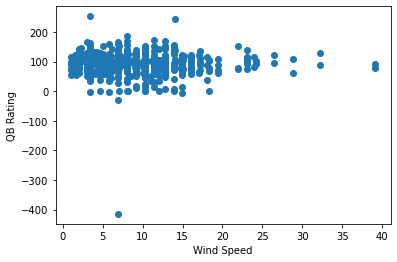

In [12]:
x_axis = combined_qb_df['windSpeed']
y_axis = combined_qb_df['QB Rating']

plt.scatter(x_axis, y_axis)
plt.xlabel('Wind Speed')
plt.ylabel('QB Rating')

Text(0, 0.5, 'QB Rating')

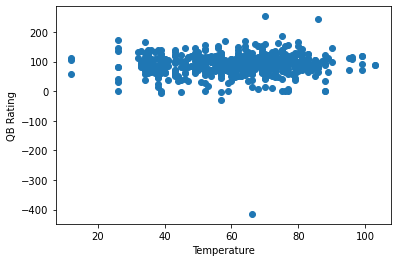

In [14]:
x_axis = combined_qb_df['temperature']
y_axis = combined_qb_df['QB Rating']

plt.scatter(x_axis, y_axis)
plt.xlabel('Temperature')
plt.ylabel('QB Rating')